<a href="https://colab.research.google.com/github/lzhu31/ds4bme_intro/blob/master/Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import numpy as np
from scipy import stats as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

# Download the data 
! if [ ! -e kirby21.csv ]; \
then wget https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/kirby21.csv; \
fi;

## Read in the data and display a few rows
dat = pd.read_csv("kirby21.csv")
dat = dat.drop(['Unnamed: 0', 'rawid', 'min', 'max'],\
             axis = 1)


Text(0, 0.5, 'Right Telencephalon Volume')

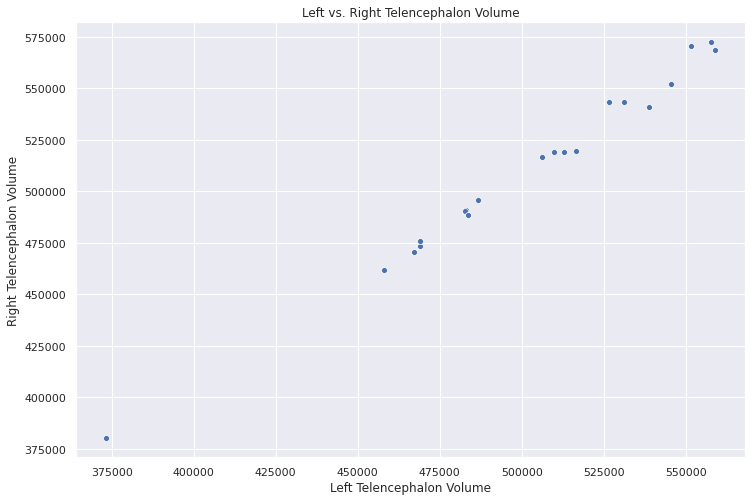

In [40]:
# Question 1 

# Obtain volumes for right telencephalon 
tel_R1 = dat.loc[(dat.roi == 'Telencephalon_R') & (dat.type == 1) & (dat.level == 1)]
tel_R = list(tel_R1['volume'])

# Obtain volumes for left telencephalon 
tel_L1 = dat.loc[(dat.roi == 'Telencephalon_L') & (dat.type == 1) & (dat.level == 1)]
tel_L = list(tel_L1['volume'])

# Plot scatterplot of the left vs right telencephalon volume
plt.figure(figsize=(12,8))
sns.scatterplot(tel_L,tel_R)
plt.title('Left vs. Right Telencephalon Volume')
plt.xlabel('Left Telencephalon Volume')
plt.ylabel('Right Telencephalon Volume')



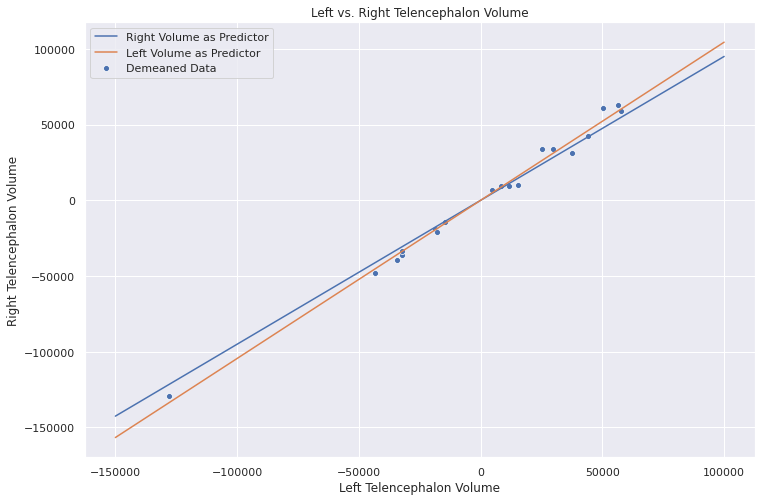

In [61]:
# Question 2

# Demean the volume values 
L_demean = tel_L - np.mean(tel_L)
R_demean= tel_R - np.mean(tel_R)

plt.figure(figsize=(12,8))
sns.scatterplot(L_demean, R_demean)

# Fit a regression through origin model for tel_R as predictor
b = sum(L_demean * R_demean) / sum(R_demean**2)
t = np.array([-150000, 100000])                         
plt.plot(t, b * t)

# Fit a regression through origin model for tel_L as predictor
c = sum(L_demean * R_demean) / sum(L_demean**2)
plt.plot(t, c * t)

plt.title('Left vs. Right Telencephalon Volume')
plt.ylabel('Right Telencephalon Volume')
plt.xlabel('Left Telencephalon Volume')
plt.legend(['Right Volume as Predictor', 'Left Volume as Predictor', 'Demeaned Data'])


# Question 3

**Origin Model**
$$ Y = BX $$

**What would be the impact on the estimate of $B$ if we replaced $X$ by $cX$ where $c$ is a positive constant?**



The estimate of B would be changed by a factor of $1/c$. 

The origin model is given by 
$$  B = 
\sum_{i=1}^n (y_i *x_i) /\sum_{i=1}^n (x_i)^2  
$$

Substituting $cx_i$ for $x_i$ 
$$  B_1 = 
\sum_{i=1}^n (y_i *cx_i) /\sum_{i=1}^n (cx_i)^2  
$$

$$  B_1 = 
c\sum_{i=1}^n (y_i *x_i) / c^2\sum_{i=1}^n (x_i)^2  
$$

$$  B_1 = 
\sum_{i=1}^n (y_i *x_i) / c\sum_{i=1}^n (x_i)^2  
$$

$$ B_1 = 1/c * B $$

#Question 4

**Let $X_i$ be a group indicator so that 
$$
x_i = I(i \in G_1)
$$
I.e. takes the value $1$ when $i$ is in group 1 and 0 if $i$ is in group 0. Consider optimizing 
$$
\sum_{i=1}^n (Y_i - \beta_0 - \beta_1 X_i)^2.
$$
If $\hat Y = \hat \beta_0 + \hat \beta_1 X$ argue that $\hat Y$ is the group mean for group 1 if $X=1$ and the group mean for group 0 if $X=0$.**

<p>&nbsp;</p>

Given that
$$\hat \beta_1 = \bar y_1 - \bar y_0$$
$$\hat \beta_0 = \bar y - \hat \beta_1 \bar x $$

from the hint, and that 

$$\bar x = p_1\;(1)$$
$$\bar y = p_1 \bar y_1 + p_0 \bar y_0\;(2)$$
$$\sum_{i=1}^n (x_i - p_1)^2 = n_1 p_0^2 + n_0 p_1 ^2 = n p_1 p_0 \;(3)$$

(Shown at the end) 

Substituting into $\hat Y = \hat \beta_0 + \hat \beta_1 X$, we get that:

$$\hat Y = \bar y - \hat \beta_1 \bar x + (\bar y_1 - \bar y_0)X$$
$$\hat Y = \bar y  + (\bar y_1 - \bar y_0)(X-\bar x)$$

$$\hat Y = p_1 \bar y_1 + p_0 \bar y_0 + (\bar y_1 - \bar y_0)(X-p_1)$$
$$\hat Y = p_1 \bar y_1 + p_0 \bar y_0 + \bar y_1X - \bar y_1p_1- \bar y_0X + \bar y_0 p_1$$
$$\hat Y = p_0 \bar y_0 + \bar y_1X - \bar y_0X + p_1\bar y_0 $$
$$\hat Y =\bar y_0 + \bar y_1X - \bar y_0X$$
$$\hat Y =\bar y_0 + (\bar y_1 - \bar y_0)X$$

Therefore, when $X = 0$
$$\hat Y = \bar y_0$$
and when $X = 1$
$$\hat Y = \bar y_1$$
which are the means for group 0 and 1, respectively.

<p>&nbsp;</p>
<p>&nbsp;</p>

$(1)$
$$\bar x = 0 * p_0 + 1*p_1 = p_1$$

$(2)$
$$\bar y = {\sum_{i=0}^1 \bar y_i *p(x_i)} = p_0*\bar y_0 +p_1* \bar y_1$$

$(3)$
$${\sum_{i=1}^n (x_i -\bar x)^2} = {\sum_{i=1}^n (x_i - p_1)^2}$$

$$ = {\sum_{i_0 = 1}^n (x_i^2 - 2p_1x_i + p_1^2)} +  {\sum_{i_1=1}^n (x_i^2 - 2p_1x_i + p_1^2)} = (n_0 p_1^2) + (n_1 - 2n_1p_1 + n_1p_1^2) = (n_0 p_1^2)+ n_1(1 - 2p_1 + p_1^2) = (n_0 p_1^2)+ n_1(1 - p_1)^2 = n_0 p_1^2 + n_1p_0^2 = n_0 (\frac {n_1} {n})^2 + n_1 (\frac {n_0} {n})^2 = \frac {n_0n_1^2 + n_1n_0^2} {n^2} = \frac{n_1n_0}{n} = \frac{n_1n_0}{n} * \frac{n}{n} = np_1p_0$$ 



In [57]:
# Question 5

def lin_regression(x,y):
  beta1 = st.pearsonr(y,x)[0] * np.std(y) / np.std(x)
  beta0 = np.mean(y) - np.mean(x) * beta1
  return ([beta0, beta1])


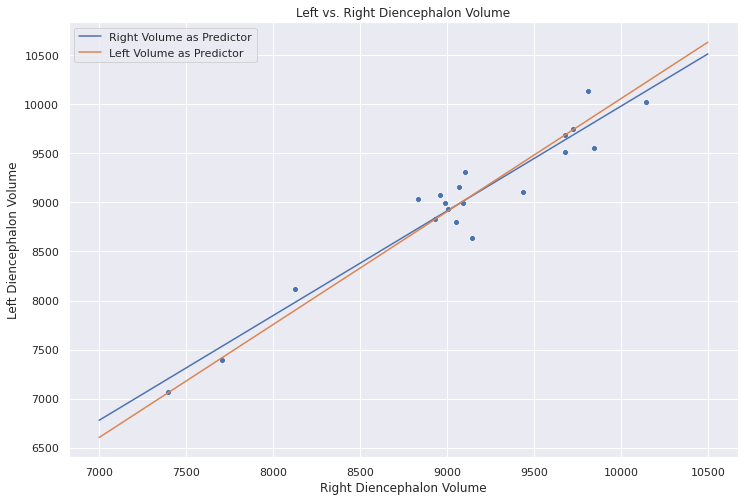

In [59]:
# Question 6

# Plot scatterplot of left and right diencephalon
di_R1 = dat.loc[(dat.roi == 'Diencephalon_R') & (dat.type == 1) & (dat.level == 1)]
di_R = np.array(di_R1['volume'])

di_L1 = dat.loc[(dat.roi == 'Diencephalon_L') & (dat.type == 1) & (dat.level == 1)]
di_L = np.array(di_L1['volume'])

plt.figure(figsize=(12,8))
sns.scatterplot(di_R,di_L)

# Find best fit line (right as predictor)
beta = lin_regression(di_R, di_L)
t1 = np.array([7000, 10500])  
sns.lineplot(t1, beta[0] + beta[1] * t1)

# Find best fit line (left as predictor)
beta1 = lin_regression(di_L,di_R)
sns.lineplot(t1, ((t1 - beta1[0])/beta1[1]))

plt.title('Left vs. Right Diencephalon Volume')
plt.xlabel('Right Diencephalon Volume')
plt.ylabel('Left Diencephalon Volume')
plt.legend(['Right Volume as Predictor', 'Left Volume as Predictor'])

#Question 7
**Argue that if you take the vectors $Y$ and $X$ and divide them by their standard deviations (respectively), the slope for either regressing $Y$ on $X$ or $X$ on $Y$ is simply the correlation.**
<p>&nbsp;</p>

The slope of the regression is given by the equation 
$$ \hat \beta_1 = Cor(x,y)* Std(y)/Std(x)  \;(1)$$

If you take the vectors $Y$ and $X$ divide them by the standard deviations, the resulting standard deviations are 1. 

The resulting variables can be given as:
$$X_1 = \frac X {Std(X)}$$
$$Y_1 = \frac Y {Std(Y)}$$

From there, you can calculate the new 
$Cor(x_1,y_1)$.

$$Cor(x_1,y_1) = \frac {Cov(x_1, y_1)} {Std(x_1)*Std(y_1)}$$

$$Cov(x_1, y_1) = Cov(\frac X {Std(X)}, \frac Y {Std(Y)})$$

$$ = \frac{Cov(X,Y)} {Std(X)*Std(Y)}$$

Substituting into $Cor(x_1,y_1)$:

$$Cor(x_1,y_1) = \frac{\frac{Cov(X,Y)} {Std(X)*Std(Y)}} {Std(x_1)*Std(y_1)}$$

Since the standard deviation of $X_1$ and $Y_1$ are both 1. Then

$$Cor(x_1,y_1) = Cor(X,Y)$$


Therefore, if you substitute the new variables $X_1$ and $Y_1$ into $(1)$, the slope for the regression will just be the correlation between $X$ and $Y$.